<a href="https://colab.research.google.com/github/SEylulOnem/DataAnlytics/blob/main/DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from google.colab import files
uploaded = files.upload()


Saving DepremVerileri.xlsx to DepremVerileri.xlsx


In [2]:
data = pd.read_excel("DepremVerileri.xlsx")

In [3]:
data.head()

,Year,Month,Date,Hours,Minutes,Name,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries,Damage
0,1980,1,1,16,42,"AZORES: TERCEIRA, ANGRA DO HEROISMO",38.727,-27.750,13,6.9,69,600,5.0
1,1980,1,24,19,0,CALIFORNIA: LIVERMORE,37.855,-121.816,11,5.9,41,50,11.5
2,1980,5,18,20,2,BALKANS NW: SERBIA,43.294,20.837,9,5.8,4,30,5.0
3,1980,5,25,16,33,CALIFORNIA: MAMMOTH LAKES,37.600,-118.840,7,6.1,0,7,2.0
4,1980,6,9,3,28,MEXICO: NW,32.220,-114.985,5,6.4,1,100,NaN


In [4]:
data.describe() # istatistiksel ifadeler. Ortalama,standart sapma,min,kartiller,max

,Year,Month,Date,Hours,Minutes,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries,Damage
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,218.000000
mean,2002.484899,6.739933,16.263423,11.590604,30.110738,20.850111,48.050591,26.028523,6.133389,1173.837248,2398.783557,2577.014147
std,11.518408,3.407034,8.535604,7.092914,17.572070,20.059034,74.670933,32.884634,0.982199,13978.648431,18718.294892,10060.671965
min,1980.000000,1.000000,1.000000,0.000000,0.000000,-43.583000,-178.252000,0.000000,1.600000,0.000000,1.000000,0.300000
25%,1993.000000,4.000000,9.000000,6.000000,14.000000,6.779500,17.831750,10.000000,5.500000,2.000000,17.000000,5.000000
50%,2003.000000,7.000000,17.000000,12.000000,30.000000,27.748500,68.008000,15.000000,6.100000,5.000000,78.500000,80.500000
75%,2013.000000,10.000000,24.000000,18.000000,45.000000,36.482750,104.272000,33.000000,6.800000,28.250000,332.500000,785.250000
max,2020.000000,12.000000,31.000000,23.000000,59.000000,52.629000,176.765000,257.000000,9.100000,316000.000000,374171.000000,100000.000000


In [5]:
data.isnull().sum()

Year                  0
Month                 0
Date                  0
Hours                 0
Minutes               0
Name                  0
Latitude              0
Longitude             0
Focal Depth (km)      0
Magnitude             0
Deaths                0
Injuries              0
Damage              378
dtype: int64

In [6]:
missing_values_count = data.isnull().sum()

#Toplam kaç tane eksik verimiz var ona bakalım
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
#Eksik verilerin yüzde(%) olarak ne kadar olduğuna bakalım
(total_missing/total_cells) * 100

4.878678368611254

Yaklaşık olarak %5 lik bir kayıp veri var 

In [7]:
damage = data.Damage.mode()[0] #en çok tekrar eden sayı
print(damage)

5.0


In [9]:
#data.Damage.fillna(damage, inplace = True) #“Damage” içinde 378 tane boş değer var. En çok kullanılmış/girilmiş değer hangisi ise onu boş değerler yerine kullanacağız. Ya da sütunu sileceğiz.

data.drop('Damage', axis = 1, inplace=True)


In [12]:
data.isnull().sum()

Year                0
Month               0
Date                0
Hours               0
Minutes             0
Name                0
Latitude            0
Longitude           0
Focal Depth (km)    0
Magnitude           0
Deaths              0
Injuries            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


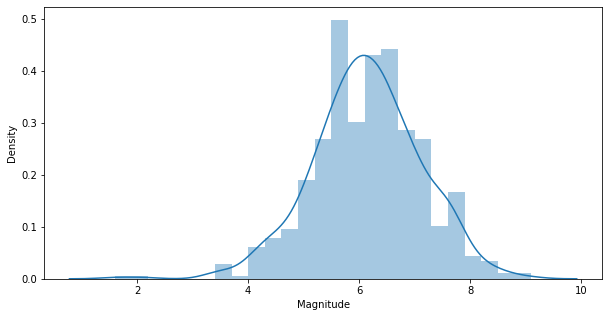

In [13]:

plt.figure(figsize=(10,5))
sbn.distplot(data["Magnitude"]) # "Magnitude(büyüklük)" kolonunun dağılım grafiği

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


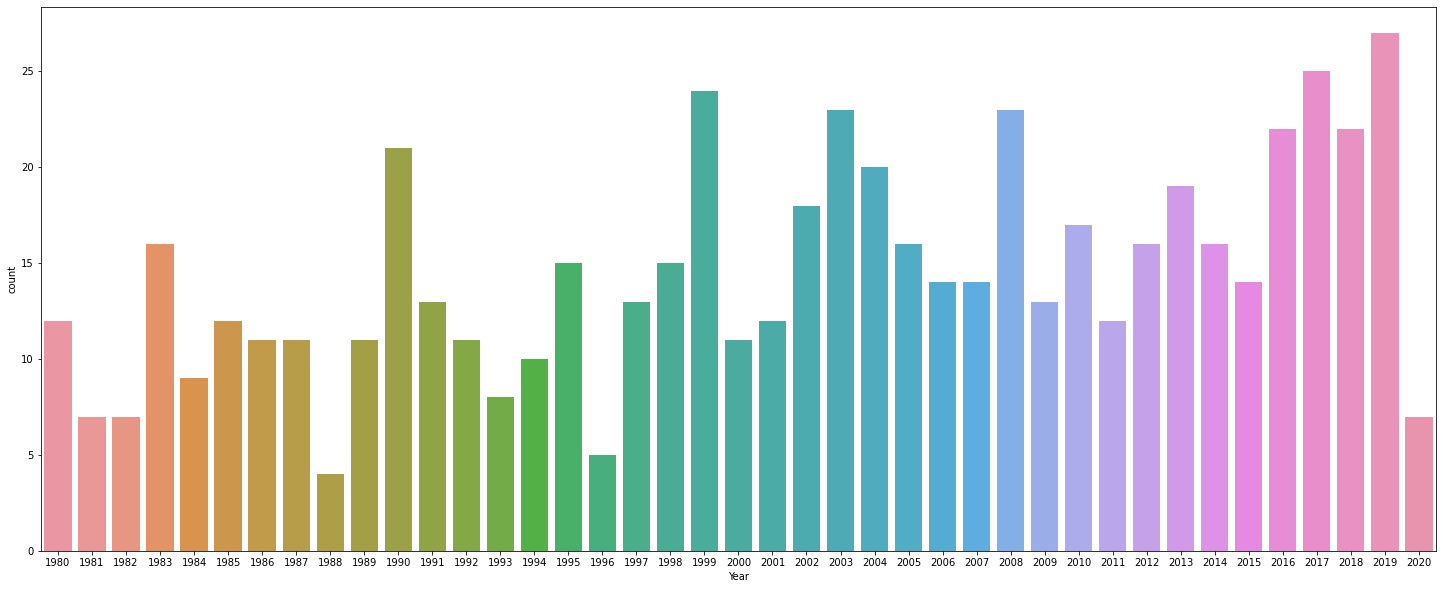

In [14]:

# hangi yılda kaç tane var 

plt.figure(figsize=(25,10))
sbn.countplot(data["Year"])

In [15]:
# verilerin birbirleri ile olan korelasyonuna bakalım
data.corr()


,Year,Month,Date,Hours,Minutes,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
Year,1.000000,-0.055796,-0.052192,-0.007646,-0.009591,-0.080380,0.092703,-0.013002,-0.023880,0.019751,-0.000486
Month,-0.055796,1.000000,0.038422,-0.007334,-0.006873,-0.028939,-0.005029,-0.024745,0.002599,-0.058819,-0.039638
Date,-0.052192,0.038422,1.000000,0.003478,-0.034506,0.068103,-0.017079,0.052820,-0.005301,-0.017733,0.003711
Hours,-0.007646,-0.007334,0.003478,1.000000,0.058092,-0.028265,-0.046649,0.071695,0.049274,0.030329,-0.043172
Minutes,-0.009591,-0.006873,-0.034506,0.058092,1.000000,-0.014528,-0.028812,-0.010310,-0.045719,0.048827,-0.013271
Latitude,-0.080380,-0.028939,0.068103,-0.028265,-0.014528,1.000000,0.123765,-0.052492,-0.233925,0.016013,0.039696
Longitude,0.092703,-0.005029,-0.017079,-0.046649,-0.028812,0.123765,1.000000,-0.042173,-0.028145,-0.048999,0.029428
Focal Depth (km),-0.013002,-0.024745,0.052820,0.071695,-0.010310,-0.052492,-0.042173,1.000000,0.216538,-0.024255,-0.026502
Magnitude,-0.023880,0.002599,-0.005301,0.049274,-0.045719,-0.233925,-0.028145,0.216538,1.000000,0.092753,0.158309
Deaths,0.019751,-0.058819,-0.017733,0.030329,0.048827,0.016013,-0.048999,-0.024255,0.092753,1.000000,0.402139


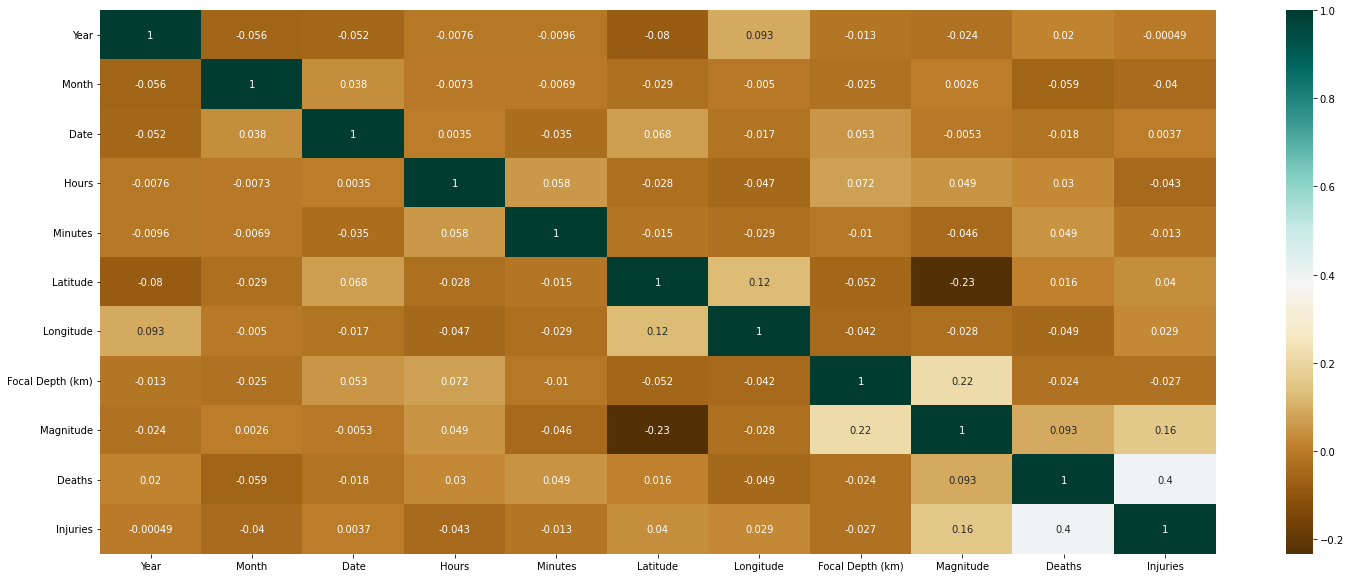

In [16]:
cor = data.corr()
plt.figure(figsize=(25,10))
sbn.heatmap(cor, cmap='BrBG', annot=True)

In [17]:
# sadece Büyüklük için yapalım. Küçükten büyüğe sıralayalım 

data.corr()["Magnitude"].sort_values()

# baktığımızda en çok etkileyen Derinlik gibi görünüyor

Latitude           -0.233925
Minutes            -0.045719
Longitude          -0.028145
Year               -0.023880
Date               -0.005301
Month               0.002599
Hours               0.049274
Deaths              0.092753
Injuries            0.158309
Focal Depth (km)    0.216538
Magnitude           1.000000
Name: Magnitude, dtype: float64

In [19]:
data.sort_values("Magnitude",ascending = False).head(10)
# en büyük ilk 10 deprem

,Year,Month,Date,Hours,Minutes,Name,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
418,2011,3,11,5,46,JAPAN: HONSHU,38.297,142.372,30,9.1,1475,6157
403,2010,2,27,6,34,"CHILE: MAULE, CONCEPCION, TALCAHUANO",-36.122,-72.898,23,8.8,402,12000
324,2005,3,28,16,9,INDONESIA: SUMATERA: SW,2.085,97.108,30,8.6,1303,340
431,2012,4,11,8,38,INDONESIA: N SUMATRA: OFF WEST COAST,2.327,93.063,20,8.6,10,12
254,2001,6,23,20,33,"PERU: AREQUIPA, MOQUEGUA, TACNA, AYACUCHO",-16.265,-73.641,33,8.4,77,2713
357,2007,9,12,11,10,INDONESIA: SUMATRA,-4.438,101.367,34,8.4,25,161
159,1994,10,4,13,22,RUSSIA: KURIL ISLANDS; JAPAN: HOKKAIDO,43.773,147.321,14,8.3,11,382
487,2015,9,16,22,55,CHILE: CENTRAL,-31.573,-71.674,22,8.3,7,14
533,2017,9,8,4,49,"MEXICO: OAXACA, CHIAPAS, TABASCO; GUATEMALA",14.761,-94.103,46,8.2,98,251
179,1996,2,17,5,59,"INDONESIA: NEW GUINEA: IRIAN JAYA: BIAK, SUPIORI",-0.891,136.952,33,8.2,54,423


In [20]:
data.sort_values("Magnitude",ascending = True).head(10)
# En küçük 10 deprem 

,Year,Month,Date,Hours,Minutes,Name,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
356,2007,8,17,0,38,UTAH,39.464,-111.207,0,1.6,3,6
448,2013,4,18,0,50,TEXAS: WEST,31.817,-97.088,0,2.1,14,200
563,2019,1,22,22,35,POLAND: RYDULTOWY,50.080,18.390,10,3.4,1,8
391,2009,8,8,13,26,CHINA: CHONGQING PROVINCE: RONGCHANG,29.358,105.438,10,3.4,2,1
396,2009,12,6,21,51,SOUTH AFRICA: CARLETONVILLE,-26.414,27.494,2,3.5,2,3
19,1982,3,28,4,16,MEXICO: CHIAPAS,17.250,-93.210,9,3.5,10,200
479,2015,2,21,21,21,BALKANS NW: BOSNIA-HERZEGOVINA:,44.534,18.934,7,3.6,4,1
562,2019,1,12,8,58,POLAND: RUDNA,51.520,16.090,2,3.8,1,6
112,1990,10,18,9,30,SOUTH AFRICA: CHARLETONVILLE,-26.390,27.349,5,4.0,10,6
18,1981,12,12,20,26,PAKISTAN: CENTRAL,29.856,66.962,33,4.0,6,12


In [21]:
len(data) # kaç tane veri var 

596

In [22]:
# % 99unu alalım (Bir verinin %99unu aldığımızda veri setini bozmamış oluruz.)

len(data)*0.01

5.96

In [23]:
# en büyük 6 deprem bulalım ve atalım. Uç değerler olabileceği için.

yuzdedoksandokuz = data.sort_values("Magnitude",ascending = False).iloc[6:] #indekse göre yerini buluyoruz

In [24]:
yuzdedoksandokuz.head()

,Year,Month,Date,Hours,Minutes,Name,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
159,1994,10,4,13,22,RUSSIA: KURIL ISLANDS; JAPAN: HOKKAIDO,43.773,147.321,14,8.3,11,382
487,2015,9,16,22,55,CHILE: CENTRAL,-31.573,-71.674,22,8.3,7,14
533,2017,9,8,4,49,"MEXICO: OAXACA, CHIAPAS, TABASCO; GUATEMALA",14.761,-94.103,46,8.2,98,251
179,1996,2,17,5,59,"INDONESIA: NEW GUINEA: IRIAN JAYA: BIAK, SUPIORI",-0.891,136.952,33,8.2,54,423
60,1985,9,19,13,17,MEXICO: MICHOACAN: MEXICO CITY,18.190,-102.533,28,8.1,9500,30000


In [25]:
yuzdedoksandokuz.describe()

,Year,Month,Date,Hours,Minutes,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,2002.432203,6.762712,16.238983,11.596610,30.128814,21.086071,48.052171,26.005085,6.107797,1180.194915,2386.935593
std,11.558575,3.408463,8.542047,7.107708,17.604127,19.894106,74.532623,33.046836,0.953293,14049.388374,18807.912636
min,1980.000000,1.000000,1.000000,0.000000,0.000000,-43.583000,-178.252000,0.000000,1.600000,0.000000,1.000000
25%,1993.000000,4.000000,9.000000,6.000000,14.250000,7.830250,18.470000,10.000000,5.500000,2.000000,17.000000
50%,2003.000000,7.000000,17.000000,12.000000,30.000000,27.796500,67.504500,15.000000,6.100000,5.000000,74.000000
75%,2013.000000,10.000000,24.000000,18.000000,45.000000,36.490250,104.292000,33.000000,6.775000,26.000000,323.750000
max,2020.000000,12.000000,31.000000,23.000000,59.000000,52.629000,176.765000,257.000000,8.300000,316000.000000,374171.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


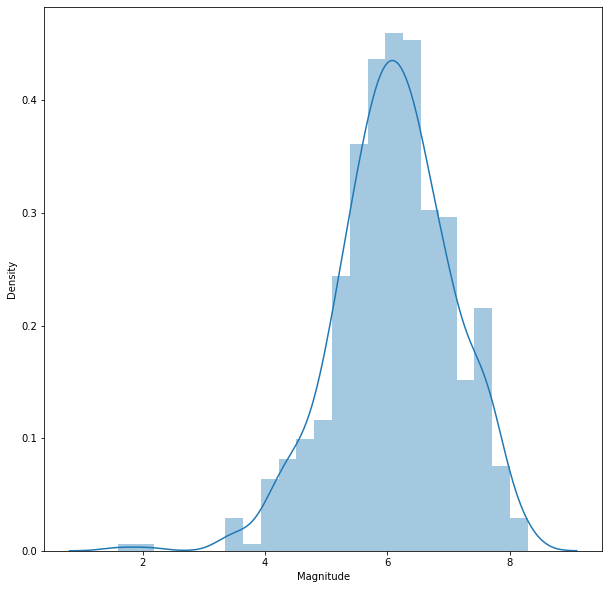

In [26]:
plt.figure(figsize = (10,10))
sbn.distplot(yuzdedoksandokuz["Magnitude"])

In [27]:
data.groupby("Year").mean()["Magnitude"] # orjinal veriyi yıla göre grupladık ve büyüklük ortalamalarını aldık.

Year
1980    6.133333
1981    5.957143
1982    5.442857
1983    6.118750
1984    5.788889
1985    6.441667
1986    5.954545
1987    5.972727
1988    6.250000
1989    5.836364
1990    6.090476
1991    5.853846
1992    6.181818
1993    6.487500
1994    6.900000
1995    6.813333
1996    6.960000
1997    6.184615
1998    6.200000
1999    6.287500
2000    6.081818
2001    6.591667
2002    6.200000
2003    6.208696
2004    5.785000
2005    6.168750
2006    5.692857
2007    6.221429
2008    6.060870
2009    6.076923
2010    5.988235
2011    6.525000
2012    6.587500
2013    6.078947
2014    5.825000
2015    6.178571
2016    6.200000
2017    5.904000
2018    6.081818
2019    5.996296
2020    5.685714
Name: Magnitude, dtype: float64

In [28]:
yuzdedoksandokuz.groupby("Year").mean()["Magnitude"] # %99luk veriyi içeren seti yıla göre grupladım ve büyüklük ortalamalarını aldım.

Year
1980    6.133333
1981    5.957143
1982    5.442857
1983    6.118750
1984    5.788889
1985    6.441667
1986    5.954545
1987    5.972727
1988    6.250000
1989    5.836364
1990    6.090476
1991    5.853846
1992    6.181818
1993    6.487500
1994    6.900000
1995    6.813333
1996    6.960000
1997    6.184615
1998    6.200000
1999    6.287500
2000    6.081818
2001    6.427273
2002    6.200000
2003    6.208696
2004    5.785000
2005    6.006667
2006    5.692857
2007    6.053846
2008    6.060870
2009    6.076923
2010    5.812500
2011    6.290909
2012    6.453333
2013    6.078947
2014    5.825000
2015    6.178571
2016    6.200000
2017    5.904000
2018    6.081818
2019    5.996296
2020    5.685714
Name: Magnitude, dtype: float64

In [29]:
data = yuzdedoksandokuz # yeni data set %99luk veriyi içeren set oluyor.

In [30]:
data.describe()

,Year,Month,Date,Hours,Minutes,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,2002.432203,6.762712,16.238983,11.596610,30.128814,21.086071,48.052171,26.005085,6.107797,1180.194915,2386.935593
std,11.558575,3.408463,8.542047,7.107708,17.604127,19.894106,74.532623,33.046836,0.953293,14049.388374,18807.912636
min,1980.000000,1.000000,1.000000,0.000000,0.000000,-43.583000,-178.252000,0.000000,1.600000,0.000000,1.000000
25%,1993.000000,4.000000,9.000000,6.000000,14.250000,7.830250,18.470000,10.000000,5.500000,2.000000,17.000000
50%,2003.000000,7.000000,17.000000,12.000000,30.000000,27.796500,67.504500,15.000000,6.100000,5.000000,74.000000
75%,2013.000000,10.000000,24.000000,18.000000,45.000000,36.490250,104.292000,33.000000,6.775000,26.000000,323.750000
max,2020.000000,12.000000,31.000000,23.000000,59.000000,52.629000,176.765000,257.000000,8.300000,316000.000000,374171.000000


In [31]:
data.head()


,Year,Month,Date,Hours,Minutes,Name,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
159,1994,10,4,13,22,RUSSIA: KURIL ISLANDS; JAPAN: HOKKAIDO,43.773,147.321,14,8.3,11,382
487,2015,9,16,22,55,CHILE: CENTRAL,-31.573,-71.674,22,8.3,7,14
533,2017,9,8,4,49,"MEXICO: OAXACA, CHIAPAS, TABASCO; GUATEMALA",14.761,-94.103,46,8.2,98,251
179,1996,2,17,5,59,"INDONESIA: NEW GUINEA: IRIAN JAYA: BIAK, SUPIORI",-0.891,136.952,33,8.2,54,423
60,1985,9,19,13,17,MEXICO: MICHOACAN: MEXICO CITY,18.190,-102.533,28,8.1,9500,30000


In [32]:
# Name kısmı numeric değil. Regresyona girdiğinde hata verecektir. O yüzden sileriz

data = data.drop("Name",axis=1)

In [33]:
data

,Year,Month,Date,Hours,Minutes,Latitude,Longitude,Focal Depth (km),Magnitude,Deaths,Injuries
159,1994,10,4,13,22,43.773,147.321,14,8.3,11,382
487,2015,9,16,22,55,-31.573,-71.674,22,8.3,7,14
533,2017,9,8,4,49,14.761,-94.103,46,8.2,98,251
179,1996,2,17,5,59,-0.891,136.952,33,8.2,54,423
60,1985,9,19,13,17,18.190,-102.533,28,8.1,9500,30000
...,...,...,...,...,...,...,...,...,...,...,...
19,1982,3,28,4,16,17.250,-93.210,9,3.5,10,200
563,2019,1,22,22,35,50.080,18.390,10,3.4,1,8
391,2009,8,8,13,26,29.358,105.438,10,3.4,2,1
448,2013,4,18,0,50,31.817,-97.088,0,2.1,14,200


In [34]:
# Şimdi regresyona hazır (Regresyon analizi, iki ya da daha çok nicel değişken arasındaki ilişkiyi ölçmek için kullanılan analiz metodudur). 
# numpy dizileri oluşturacağız
# sklearn kullanarak test ve train splitlerini yapacağız
# scaling işlemleri yapılacak
# modeli oluşturup eğiteceğiz

y = data["Magnitude"].values # Büyüklükleri alıp y dizisine atıyoruz
x = data.drop("Magnitude",axis=1).values # geri kalanları alıyoruz.

In [35]:
x

array([[1.994e+03, 1.000e+01, 4.000e+00, ..., 1.400e+01, 1.100e+01,
        3.820e+02],
       [2.015e+03, 9.000e+00, 1.600e+01, ..., 2.200e+01, 7.000e+00,
        1.400e+01],
       [2.017e+03, 9.000e+00, 8.000e+00, ..., 4.600e+01, 9.800e+01,
        2.510e+02],
       ...,
       [2.009e+03, 8.000e+00, 8.000e+00, ..., 1.000e+01, 2.000e+00,
        1.000e+00],
       [2.013e+03, 4.000e+00, 1.800e+01, ..., 0.000e+00, 1.400e+01,
        2.000e+02],
       [2.007e+03, 8.000e+00, 1.700e+01, ..., 0.000e+00, 3.000e+00,
        6.000e+00]])

In [36]:
y

array([8.3, 8.3, 8.2, 8.2, 8.1, 8. , 8. , 8. , 8. , 8. , 7.9, 7.9, 7.8,
       7.8, 7.8, 7.8, 7.8, 7.8, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7,
       7.7, 7.7, 7.7, 7.7, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6,
       7.6, 7.6, 7.6, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.4, 7.4, 7.4, 7.4, 7.4, 7.3, 7.3, 7.3, 7.3, 7.3,
       7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.2, 7.2, 7.2, 7.2, 7.2,
       7.2, 7.2, 7.2, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1,
       7.1, 7.1, 7.1, 7. , 7. , 7. , 7. , 7. , 7. , 7. , 7. , 7. , 7. ,
       7. , 7. , 7. , 7. , 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9,
       6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9,
       6.9, 6.9, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8,
       6.8, 6.8, 6.8, 6.8, 6.8, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
       6.7, 6.7, 6.7, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6,
       6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.

In [37]:
from sklearn.model_selection import train_test_split # x_train x_test y_train y_test şeklinde bölüyoruz

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [39]:
len(x_train)

413

In [40]:
len(x_test)

177

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
x_train.shape

(413, 10)

In [46]:
model = Sequential()

model.add(Dense(12, activation = "relu")) # 12 tane nöron ekledik, aktivasyon fonksiyonu olarak ise "relu" seçtik
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu")) 

# derin ağ olacak şekilde 4 katman ekledik

model.add(Dense(1))  # çıkış katmanı ekledik

model.compile(optimizer = "adam",loss="mse") # bunu compile ederken bir tane optimizer seçmemiz gerekiyor

In [49]:
model.fit(x=x_train, y=y_train, validation_data = (x_test, y_test), batch_size = 250, epochs =300 )

Epoch 1/300
2/2 [==============================] - 0s 98ms/step - loss: 0.7598 - val_loss: 0.8328
Epoch 2/300
2/2 [==============================] - 0s 69ms/step - loss: 0.7592 - val_loss: 0.8321
Epoch 3/300
2/2 [==============================] - 0s 35ms/step - loss: 0.7588 - val_loss: 0.8304
Epoch 4/300
2/2 [==============================] - 0s 31ms/step - loss: 0.7586 - val_loss: 0.8305
Epoch 5/300
2/2 [==============================] - 0s 34ms/step - loss: 0.7584 - val_loss: 0.8314
Epoch 6/300
2/2 [==============================] - 0s 29ms/step - loss: 0.7576 - val_loss: 0.8309
Epoch 7/300
2/2 [==============================] - 0s 32ms/step - loss: 0.7574 - val_loss: 0.8313
Epoch 8/300
2/2 [==============================] - 0s 30ms/step - loss: 0.7572 - val_loss: 0.8316
Epoch 9/300
2/2 [==============================] - 0s 36ms/step - loss: 0.7564 - val_loss: 0.8308
Epoch 10/300
2/2 [==============================] - 0s 34ms/step - loss: 0.7565 - val_loss: 0.8308
Epoch 11/300
2/2 [=

In [50]:
LossData = pd.DataFrame(model.history.history)

(       loss  val_loss
 0  0.759760  0.832761
 1  0.759187  0.832120
 2  0.758767  0.830421
 3  0.758559  0.830464
 4  0.758394  0.831383,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb67f0d7e50>)

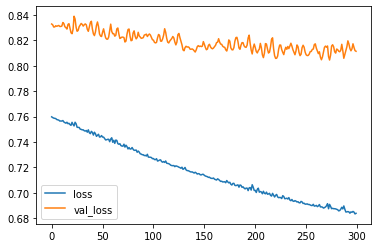

In [51]:
LossData.head() , LossData.plot()

In [52]:
# epoch fazla verseydik overfitting olabilirdi.

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
predictArray = model.predict(x_test) 

6/6 [==============================] - 0s 2ms/step


In [54]:
predictArray

array([[3.4308906],
       [5.7230062],
       [5.8959904],
       [5.5383096],
       [7.195454 ],
       [5.47228  ],
       [6.124658 ],
       [5.6726017],
       [6.372539 ],
       [6.0432124],
       [6.128987 ],
       [6.0575666],
       [5.683865 ],
       [6.0880713],
       [6.6453004],
       [6.3964105],
       [5.8435025],
       [5.905583 ],
       [5.9140716],
       [5.702133 ],
       [9.853021 ],
       [6.314078 ],
       [5.5593095],
       [5.8591294],
       [6.536517 ],
       [5.716805 ],
       [5.658182 ],
       [5.788594 ],
       [6.2156777],
       [5.5667605],
       [5.872007 ],
       [6.024588 ],
       [6.043058 ],
       [5.8790355],
       [6.479057 ],
       [5.691439 ],
       [6.1850457],
       [5.972205 ],
       [8.351262 ],
       [6.5046124],
       [6.2184157],
       [6.5783696],
       [5.885944 ],
       [5.739331 ],
       [6.1775155],
       [5.584353 ],
       [5.800285 ],
       [5.3564067],
       [6.765578 ],
       [5.7179217],


In [55]:
mean_absolute_error(y_test, predictArray) # 0.71 lik fark var arada

0.711720835152319

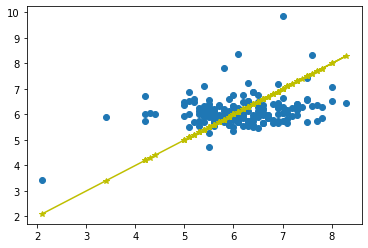

In [56]:
data.describe()

plt.scatter(y_test, predictArray)

plt.plot(y_test, y_test, "y-*") #  sapmalar mevcut

In [57]:
data.iloc[2]

Year                2017.000
Month                  9.000
Date                   8.000
Hours                  4.000
Minutes               49.000
Latitude              14.761
Longitude            -94.103
Focal Depth (km)      46.000
Magnitude              8.200
Deaths                98.000
Injuries             251.000
Name: 533, dtype: float64

In [58]:
yeniDeprem = data.drop("Magnitude",axis=1).iloc[2]

In [59]:
type(yeniDeprem)

pandas.core.series.Series

In [61]:
yeniDeprem = scaler.transform(yeniDeprem.values.reshape(-1,10))

In [62]:
model.predict(yeniDeprem) # yeni olacak olan depremin büyüklük tahminini yaptık

1/1 [==============================] - 0s 15ms/step


array([[6.664395]], dtype=float32)